# Some startup code

import packages needed & load dataset

In [1]:
import warnings
from sklearn.utils import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from sklearn import svm, datasets, preprocessing
import numpy as np
from loaddata import get_instances_from_csv
from startEvaluation import evaluation
from matplotlib import pyplot as plt
%matplotlib inline



DATAPATH = "../sub_datasets/subset_0.csv"
DATAPATH1 = "../sub_datasets/subset_1.csv"
RANDOM_SEED=42
TRAINROWS = 200000
EVALROWS = 30000

training_data = get_instances_from_csv(DATAPATH, "train", numrows=TRAINROWS)
eval_data = get_instances_from_csv(DATAPATH1,"train", numrows=EVALROWS)
print("training data  : %s rows"%training_data[0].shape[0])
print("evaluation data: %s rows"%eval_data[0].shape[0])

kernels = ['rbf', 'linear', 'sigmoid', 'poly']

scaler = preprocessing.StandardScaler()
scaler.fit(training_data[0])
print(scaler)

def print_prediction(training_data, eval_data, *args, **kwargs):

    svc = svm.SVC(random_state=RANDOM_SEED, cache_size=2000, max_iter=4000, *args, **kwargs).fit(training_data[0], training_data[1])
    print(svc)
    evt = evaluation(training_data[1], svc.predict(training_data[0]))
    a1 = evt.print_only_accuracy()
    eve = evaluation(eval_data[1], svc.predict(eval_data[0]))
    a2 = eve.print_only_accuracy()
    return (a1, a2)


/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


training data  : 199999 rows
evaluation data: 29999 rows
StandardScaler(copy=True, with_mean=True, with_std=True)


## Basic SVM
As you can see the print_prediction function fits the SVM-Model to the training data and prints a very simple evaluation.

10000
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.885688568857
0.847761592053
13335
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.88810559472
0.853895129838
17782
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.891625892807
0.859461982066
23713
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, ve

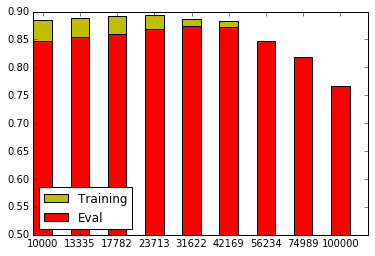

In [2]:
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in np.logspace(4, 5, 9):
    print(int(num))
    a = print_prediction([training_data[0][1:int(num)],training_data[1][1:int(num)]], eval_data)
    plot_data_num.append(int(num))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.ylim(ymin=.5)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)



plt.show()

As you can see the maximum accuracy is reached between 30k and 40k samples, as the solver is not able to find a good solution for more samples. As such future computations will be made with 42k samples.
Additional benefit: Computation goes much faster. However a method to include more training data might be beneficial.

In [3]:
training_data = get_instances_from_csv(DATAPATH, "train", numrows=42000)
print_prediction(training_data, eval_data)

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.883640086669
0.873895796527


(0.88364008666873017, 0.87389579652655092)


## Lets use different kernels and see how the perform
Currently there are 3 Kernels implemented by sklearn that we can test. (Of course we could also implement own kernels later on)

In [4]:
for kernel in kernels:
    print(kernel)
    print_prediction(training_data, eval_data, kernel=kernel)

rbf
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.883640086669
0.873895796527
linear
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.558799019024
0.563718790626
sigmoid
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.133669849282
0.136404546818
poly
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=

The RBF kernel seems to perform slightly better then the linear kernel. Both are far better then the polynomial kernel.

## Lets also check, if scaling the data improves the classification performance
Luckily sklearn also provides features for scaling data, the standart scaling function from sklearn scales the data in a way that variance == 1 and mean == 0.

In [5]:
kernels = ['rbf', 'linear', 'poly'] # only use the kernels with good performance

training_data_scaled = [scaler.transform(training_data[0]), training_data[1]]
eval_data_scaled = [scaler.transform(eval_data[0]), eval_data[1]]
for kernel in kernels:
    print(kernel)
    print_prediction(training_data_scaled, eval_data_scaled, kernel=kernel)

rbf
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.892759351413
0.885396179873
linear
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.541774804162
0.539917997267
poly
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.623181504322
0.627520917364


## Parameter Variations
For faster computing only the best-performing kernels are used here.

SVC(C=0.01, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.753494130813
0.757258575286
SVC(C=0.037275937203149402, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.803114359866
0.800260008667
SVC(C=0.13894954943731375, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.852472677921
0.846894896497
SVC(C=0.51794746792312096, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shri

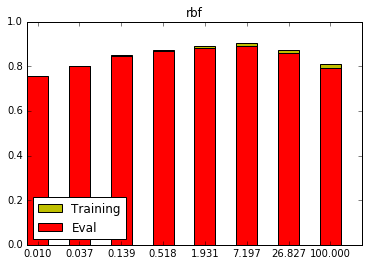

SVC(C=0.01, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.437891378366
0.438314610487
SVC(C=0.037275937203149402, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.604776304198
0.611853728458
SVC(C=0.13894954943731375, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.449820233815
0.449948331611
SVC(C=0.51794746792312096, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_st

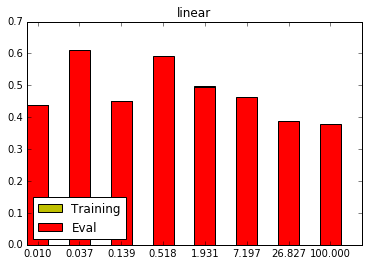

SVC(C=0.01, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.659920474297
0.662655421847
SVC(C=0.037275937203149402, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.604728684016
0.595619853995
SVC(C=0.13894954943731375, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.491702183385
0.493216440548
SVC(C=0.51794746792312096, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=42, 

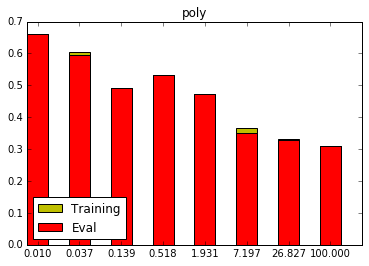

In [14]:
for kernel in kernels:
    plot_data_num = []
    plot_data_accuracy = []
    plot_data_accuracy1 = []
    for C in np.logspace(-2, 2, num=8):
        a = print_prediction(training_data, eval_data, kernel=kernel, C=C)
        plot_data_num.append("{0:.3f}".format(C))
        plot_data_accuracy.append(a[0])
        plot_data_accuracy1.append(a[1])

    plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
    plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
    plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
    plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
    plt.title(kernel)
    plt.show()

SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.646158241863
0.649121637388
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0026826957952797246,
  kernel='rbf', max_iter=4000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.668706397771
0.671022367412
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0071968567300115215,
  kernel='rbf', max_iter=4000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.720707635896
0.722157405247
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.019306977288832496,
  kernel='rbf', max_iter=4000, probability=False, random_state=42,
  shrinking

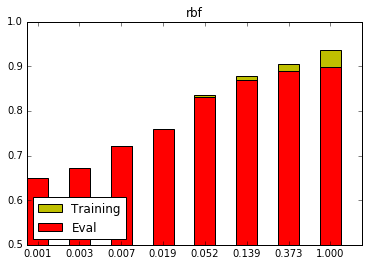

SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.324983928189
0.325210840361
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0026826957952797246,
  kernel='poly', max_iter=4000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.334865115836
0.333877795927
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0071968567300115215,
  kernel='poly', max_iter=4000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.649158313293
0.655121837395
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.019306977288832496,
  kernel='poly', max_iter=4000, probability=False, random_state=42,
  shrin

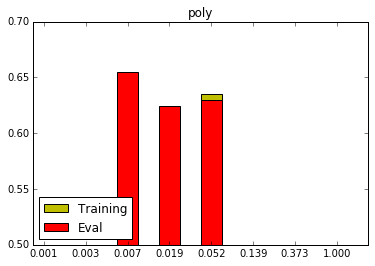

In [17]:

for kernel in ['rbf','poly']:
    plot_data_num = []
    plot_data_accuracy = []
    plot_data_accuracy1 = []
    for gamma in np.logspace(-3, 0, num=8):
        a = print_prediction(training_data, eval_data, kernel=kernel, gamma=gamma)
        plot_data_num.append("{0:.3f}".format(gamma))
        plot_data_accuracy.append(a[0])
        plot_data_accuracy1.append(a[1])

    plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
    plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
    plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
    plt.ylim(ymin=.5)
    plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
    plt.title(kernel)
    plt.show()


In [11]:

for kernel in kernels:
    for decision_function_shape in ['ovo', 'ovr']:
        print_prediction(training_data, eval_data, kernel=kernel, decision_function_shape=decision_function_shape)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.883640086669
0.873895796527
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.883640086669
0.873895796527
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.558799019024
0.563718790626
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)


* ovo and ovr strategies have nearly no impact on classification accuracy

SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=1.0, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.541774804162
0.539917997267
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=1.0, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.555513226505
0.551585052835
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.34429391176
0.350945031501
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=4, gamma=1.0, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.572037429463
0.56

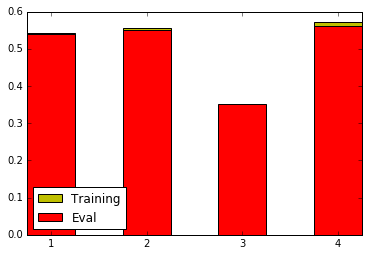

In [16]:

plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for degree in range(1,5):
    a = print_prediction(training_data_scaled, eval_data_scaled, kernel='poly', degree=degree, gamma=1.0)
    plot_data_num.append(degree)
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
plt.show()

SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.3, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.573061263363
0.578052601753
SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.3, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.716064668206
0.720924030801
SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.60353817948
0.608120270676
SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=4, gamma=0.3, kernel='poly',
  max_iter=4000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.590085478226
0.59

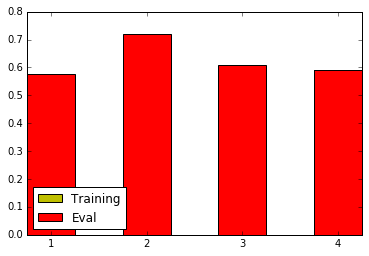

In [19]:

plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for degree in range(1,5):
    a = print_prediction(training_data_scaled, eval_data_scaled, kernel='poly', degree=degree, gamma=0.3, C=0.1)
    plot_data_num.append(degree)
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
plt.show()